<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data School</h1><h2>Data Exploration</h2><h3>Case Study 1</h3></th>
        <th style="text-align:center; width:25%">
        <div class="alert alert-block alert-info", style='background:black' ><img src='https://dataschool.sg/static/media/data-school.66a3470f.png' style="width: 250px; height: 125px; "></div></th>
    </tr>
</table>





<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><div class="alert alert-block alert-info", style='background:gray' ><img src='https://www.sginnovate.com/sites/default/files/brand-logo.png' style="width: 250px; height: 125px; "></div></th>
        <th style="text-align:center;"><h1></h1><h2>With our esteemed partners</h2><h3></h3></th>
        <th style="text-align:center; width:25%"><img src='http://1.bp.blogspot.com/_yhJCyboCJYc/THClIailuLI/AAAAAAAAAws/468ePgviUso/S250/Developer+Learning+Solutions.png' style="width: 250px; height: 125px; "></th>
    </tr>
</table>

# Case Study 1

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the DataFrame

In [2]:
# Read the "CSV" file using Pandas Read CSV function
df = pd.read_csv("insurance.csv")
df.shape

(1338, 7)

In [3]:
# Inspect the first five rows
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
# Understand the different column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Examining the DataFrame

In [5]:
# Using some simple analytical values
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("Features : " , df.columns.tolist())
print ("Missing values :  ", df.isnull().sum().values.sum())
print ("Unique values : ")
print (df.nunique())

Rows     :  1338
Columns  :  7
Features :  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Missing values :   0
Unique values : 
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


## Correlation Between Columns

In [6]:
# Understand correlation between the various columns
df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

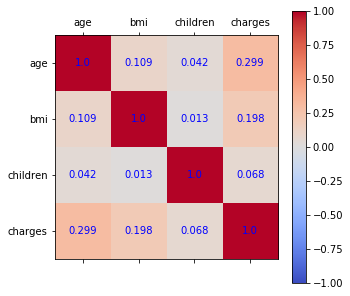

In [7]:
#------Plotting the correlation map using matplotlib-----
%matplotlib inline
import matplotlib.pyplot as plt

corr = df.corr()

fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)                                 # display the color bar on the right

# displays the ticks for the x and y-axes
ticks = np.arange(0,len(corr.columns)) 
ax.set_xticks(ticks)

ax.set_xticklabels(corr.columns) 
# plt.xticks(rotation = 90)

ax.set_yticklabels(corr.columns) 
ax.set_yticks(ticks)

#---print the correlation factor--- 
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(i, j, 
                       round(corr.iloc[i][j], 3), # 3 decimal places
                       ha="center",               # horizontal alignment
                       va="center",               # vertical alignment
                       color="b")                 # color of text
plt.show()
#-------------------------

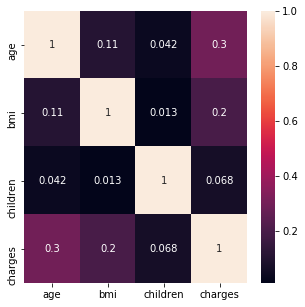

In [8]:
#------Plotting the correlation map using seaborn-----
import seaborn as sns 

sns.heatmap(df.corr(),annot=True)

# get a reference to the current figure 
fig = plt.gcf()

# set its size
fig.set_size_inches(5,5)
#-------------------------

## Exploring the Features

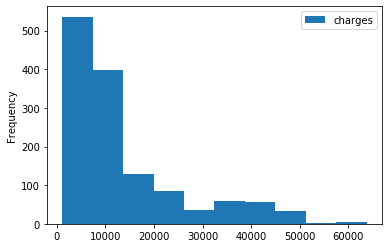

In [9]:
# Simple histogram for charges
df.plot(kind="hist", y="charges", bins=10)
# Explain the skewness

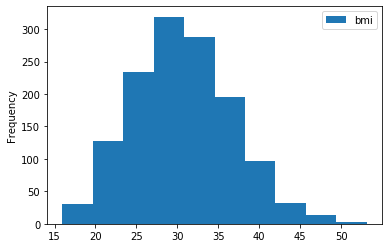

In [10]:
# Simple histogram for bmi
df.plot(kind="hist", y="bmi", bins=10)
# Seems more normally distributed

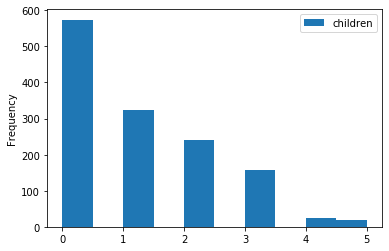

In [11]:
# Simple histogram for children
df.plot(kind="hist", y="children")
# Explain the skewness

In [12]:
# Data Preprocessing
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Dropping Columns

In [13]:
# Drop the region as it does not add value
df.drop(["region"], axis=1, inplace=True)
df.head()

age     sex     bmi  children smoker      charges
0   19  female  27.900         0    yes  16884.92400
1   18    male  33.770         1     no   1725.55230
2   28    male  33.000         3     no   4449.46200
3   33    male  22.705         0     no  21984.47061
4   32    male  28.880         0     no   3866.85520

## Label Encoding Categorical Values

In [14]:
# Changing binary categories to 1s and 0s
# df['sex'] = df['sex'].map(lambda s :0  if s == 'female' else 1)    # -------changed: female:0, male:1---------
# df['smoker'] = df['smoker'].map(lambda s :1  if s == 'yes' else 0)
# df.head()

In [15]:
#--------Label encoding using sklearn--------
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
print(labelencoder.classes_)  # alphabetical order
# ['female' 'male']
# [   0,      1 ]

df['smoker'] = labelencoder.fit_transform(df['smoker'])
print(labelencoder.classes_)
# ['no' 'yes']
# [ 0,    1 ]
df
#------------------------------

['female' 'male']
['no' 'yes']


age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]

In [16]:
#-----One Hot Encoding----
#-----using Dummies in pd------
# df = pd.get_dummies(df, columns=['sex'], prefix=['sex_'])
# df = pd.get_dummies(df, columns=['smoker'], prefix=['smoker_'])
# df
#------------------------

In [17]:
#---performing normalization for the age and bmi---
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# df['age'] = min_max_scaler.fit_transform(df['age'].values.reshape(-1,1))
# df['bmi'] = min_max_scaler.fit_transform(df['bmi'].values.reshape(-1,1))
# df
#-------------------

## Preparing the DataFrame for Training

In [18]:
# What model to use if predicted target is charges
# Regression Linear Model
dX = df.drop(['charges'], axis = 1)   # dX is features
dy = df.charges                       # dy is label
X = dX.values
y = dy.values

In [19]:
#-------Examine the dX-----------
dX

age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1338 rows x 5 columns]

In [20]:
#-------Examine the dy-----------
dy

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Splitting the Data into Training and Testing Sets

In [21]:
# Import the necessary library tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

#------print the shape of the training and testing sets--------
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#--------------------------------------------------------------


# 335/ (train x 1003 + test x 335) = 0.25 (to find out the default size)


(1003, 5)
(335, 5)
(1003,)
(335,)


## Training the Model

In [22]:
model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


## Evaluating the Model

In [23]:
#-------R-Squared------
print(model.score(X_test, y_test))

0.7486163979240839


In [24]:
# ---just a simple experiment to see if the R-squared value changes if one-hot encoding is used instead---
# R-Squared
#    One-hot-encoding - 0.7486163979240839
#    Label Encoding   - 0.7486163979240839

# we also tried to normalize the age and bmi to see if R-squared is affected
#    Normalization    - 0.748616397924084

In [25]:
# The score here is the R squared and shows the fit of the model
# The difference in this situation is that X is no longer a single column variable but multiple columns
# Drawing a linear trend line is not possible

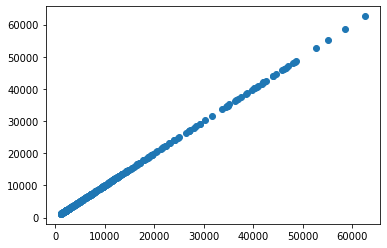

In [26]:
# Shows the prediction matches
plt.scatter(y_test,y_test)

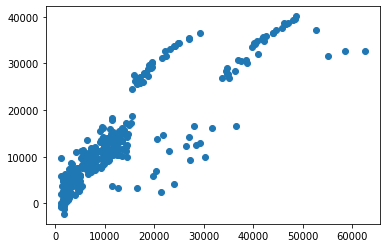

In [27]:
plt.scatter(y_test,y_test_pred)

## Making Predictions

In [28]:
#------Updated (using label encoding)------
# Sex    - female is 0 and male is 1 
# Smoker - No is 0 and Yes is 1
# Model takes in (age, sex, bmi, children, smoker)

# Predict this two cases
# Case 1
# Age - 44, Sex - 'Male', Smoker - 'Yes', Children - 2, BMI - 33.1
case1 = model.predict([[44, 1, 33.1, 2, 1]])

# Case 2
# Age - 24, Sex - 'Female', Smoker - 'No', Children - 0, BMI - 22.4
case2 = model.predict([[24, 0, 22.4, 0, 0]])

In [29]:
# #------using One-Hot encoding------
# # Predict this two cases
# # Case 1
# # Age - 44, Sex - 'Male', Smoker - 'Yes', Children - 2, BMI - 33.1
# case1 = model.predict([[44, 33.1, 2, 0, 1, 0, 1]])

# # Case 2
# # Age - 24, Sex - 'Female', Smoker - 'No', Children - 0, BMI - 22.4
# case2 = model.predict([[24, 22.4, 0, 1, 0, 1, 0]])

In [30]:
print(case1) #he has to pay more 34620.04683535 for premium

[34620.04683535]


In [31]:
print(case2) #he has to pay less 34620.04683535 for premium

[1462.40408784]


In [32]:
# The difference probably due to age, smoking, children and the bmi values

In [33]:
df

age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]